<a href="https://colab.research.google.com/github/Deeptendra/SIP-Assignment-3-Images/blob/main/SIP_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Libraries**
Loading the following requisite Libraries:

1.   **requests**: For downloading the images
2.   **PIL**: For image loading and writing
3.   **numpy**: For working on the image as a 2-d Array
4.   **matplotlib**: For visualization
5.   **math**: For math functions like cos, sin, etc



In [7]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

# **Downloading the images**
Downloading the images from GitHub repository

In [8]:
urls = {
    "building": "https://github.com/Deeptendra/SIP-Assignment-3-Images/raw/refs/heads/main/building-600by600.tif",
    "cameraman": "https://github.com/Deeptendra/SIP-Assignment-3-Images/raw/refs/heads/main/cameraman.tif",
    "chestXray": "https://github.com/Deeptendra/SIP-Assignment-3-Images/raw/refs/heads/main/chestXray.tif"
}

for name, url in urls.items():
    out_path = f"/content/{name}.tif"
    r = requests.get(url)
    with open(out_path, "wb") as f:
        f.write(r.content)
    print(f"Saved {name}")

Saved building
Saved cameraman
Saved chestXray


# **Visualizing a sample image**
Employing matplotlib to visualize the image of a building

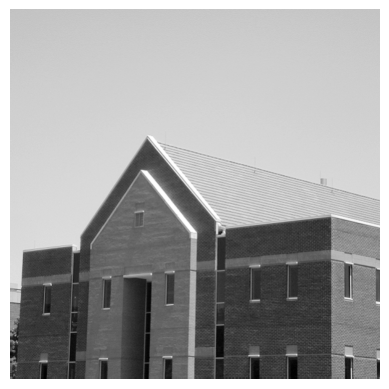

In [9]:
img = Image.open("/content/building.tif").convert("L")
arr = np.array(img)

plt.imshow(arr, cmap="gray")
plt.axis("off")
plt.show()

# **Defining function: rotate_image**
We define the `rotate_image` function with the following major steps:
1. Converting the image into a numpy 2-d array and getting its dimension
2. Getting the coordinate of the center of the image
3. Initializing the rotated image as a matrix of zeroes with size same as that of the input image
4. For each pixel in the rotated image, calculate its position in the pre-rotated image and calculate the intensity value at this position using interpolation
5. For nearest-neighbour interpolation, simply round the position and get the intensity value at this position
6. For bilinear, get the intensity values at the 4 nearest-neighbours and then apply the bilinear formula



In [10]:
def rotate_image(img_tiff, angle_degrees, interpolation="nearest"):
    """
    Rotate a grayscale image by angle_degrees using chosen interpolation.
    interpolation: 'nearest' or 'bilinear'
    """
    img = np.array(img_tiff.convert("L"))
    h, w = img.shape
    angle_rad = math.radians(angle_degrees)

    cx, cy = w // 2, h // 2

    rotated = np.zeros_like(img)

    for y_new in range(h):
        for x_new in range(w):

            x_shifted = x_new - cx
            y_shifted = y_new - cy

            x_old =  math.cos(-angle_rad) * x_shifted - math.sin(-angle_rad) * y_shifted + cx
            y_old =  math.sin(-angle_rad) * x_shifted + math.cos(-angle_rad) * y_shifted + cy

            if interpolation == "nearest":
                x_nn, y_nn = round(x_old), round(y_old)
                if 0 <= x_nn < w and 0 <= y_nn < h:
                    rotated[y_new, x_new] = img[y_nn, x_nn]

            elif interpolation == "bilinear":
                x0, y0 = int(math.floor(x_old)), int(math.floor(y_old))
                x1, y1 = x0 + 1, y0 + 1

                if 0 <= x0 < w and 0 <= y0 < h:

                    Ia = img[y0, x0] if (0 <= x0 < w and 0 <= y0 < h) else 0
                    Ib = img[y0, x1] if (0 <= x1 < w and 0 <= y0 < h) else 0
                    Ic = img[y1, x0] if (0 <= x0 < w and 0 <= y1 < h) else 0
                    Id = img[y1, x1] if (0 <= x1 < w and 0 <= y1 < h) else 0

                    dx, dy = x_old - x0, y_old - y0

                    rotated[y_new, x_new] = (
                        Ia * (1 - dx) * (1 - dy) +
                        Ib * dx * (1 - dy) +
                        Ic * (1 - dx) * dy +
                        Id * dx * dy
                    )

    return Image.fromarray(rotated.astype(np.uint8))

# **Visualizing Rotated Images**
Employing matplotlib to visualize the rotated images

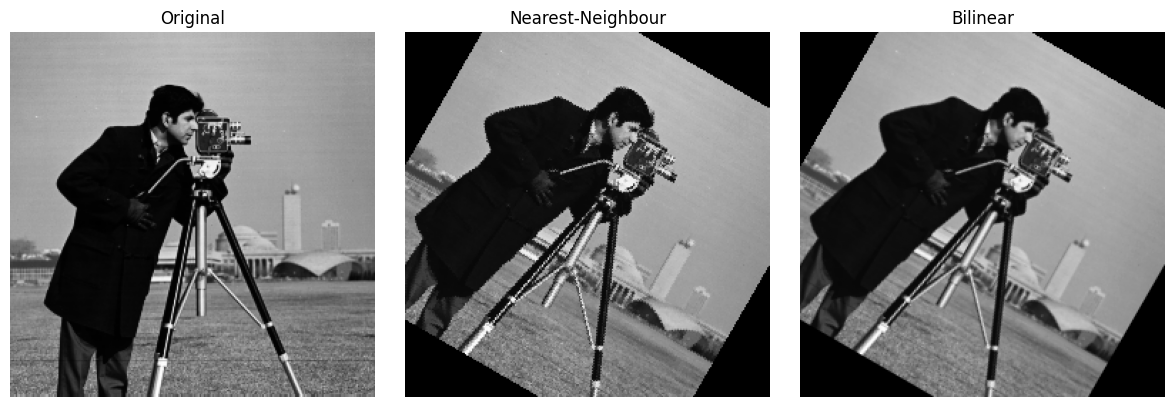

In [11]:
img = Image.open("/content/cameraman.tif").convert("L")

rotated_nn = rotate_image(img, 30, interpolation="nearest")
rotated_bl = rotate_image(img, 30, interpolation="bilinear")

rotated_nn.save("rotated_nearest.tiff")
rotated_bl.save("rotated_bilinear.tiff")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))


axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")


axes[1].imshow(rotated_nn, cmap="gray")
axes[1].set_title("Nearest-Neighbour")
axes[1].axis("off")


axes[2].imshow(rotated_bl, cmap="gray")
axes[2].set_title("Bilinear")
axes[2].axis("off")


plt.tight_layout()
plt.show()

# **Interactive widget (lagging)**
Created an interactive widget for better visualizing but it is quite laggy.

In [12]:
from ipywidgets import interact, IntSlider

def interactive_rotation(img_path):
    """Interactive widget to rotate image by varying angle."""
    img = Image.open(img_path).convert("L")

    def update(angle):
        rotated_nn = rotate_image(img, angle, interpolation="nearest")
        rotated_bl = rotate_image(img, angle, interpolation="bilinear")

        fig, axes = plt.subplots(1, 3, figsize=(12, 4))

        axes[0].imshow(img, cmap="gray")
        axes[0].set_title("Original")
        axes[0].axis("off")

        axes[1].imshow(rotated_nn, cmap="gray")
        axes[1].set_title(f"Nearest ({angle}°)")
        axes[1].axis("off")

        axes[2].imshow(rotated_bl, cmap="gray")
        axes[2].set_title(f"Bilinear ({angle}°)")
        axes[2].axis("off")

        plt.tight_layout()
        plt.show()

    interact(update, angle=IntSlider(min=-180, max=180, step=5, value=0))


interactive_rotation("/content/chestXray.tif")


interactive(children=(IntSlider(value=0, description='angle', max=180, min=-180, step=5), Output()), _dom_clas…